In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df=pd.read_csv('C:\\Users\\Anjali More\\OneDrive\\Desktop\\ARIMA_ITC.csv')

In [35]:
df.head()

,Date,Open
0,1/1/2003,14.83
1,2/1/2003,14.29
2,3/1/2003,14.56
3,4/1/2003,13.98
4,5/1/2003,15.17


In [36]:
df.tail()

,Date,Open
236,9/1/2022,319.50
237,10/1/2022,332.90
238,11/1/2022,349.25
239,12/1/2022,341.70
240,1/1/2023,330.90


In [37]:
## Cleaning up the data
df.columns=["Month","StockPrice"]
df.head()

,Month,StockPrice
0,1/1/2003,14.83
1,2/1/2003,14.29
2,3/1/2003,14.56
3,4/1/2003,13.98
4,5/1/2003,15.17


In [38]:
df.tail()

,Month,StockPrice
236,9/1/2022,319.50
237,10/1/2022,332.90
238,11/1/2022,349.25
239,12/1/2022,341.70
240,1/1/2023,330.90


In [39]:
df.set_index('Month',inplace=True)

In [40]:
df.head()

,StockPrice
Month,
1/1/2003,14.83
2/1/2003,14.29
3/1/2003,14.56
4/1/2003,13.98
5/1/2003,15.17


In [41]:
df.tail()

,StockPrice
Month,
9/1/2022,319.50
10/1/2022,332.90
11/1/2022,349.25
12/1/2022,341.70
1/1/2023,330.90


In [42]:
df.describe()

,StockPrice
count,241.000000
mean,157.530456
std,95.419588
min,13.980000
25%,61.990000
50%,180.980000
75%,236.900000
max,349.250000


<Axes: xlabel='Month'>

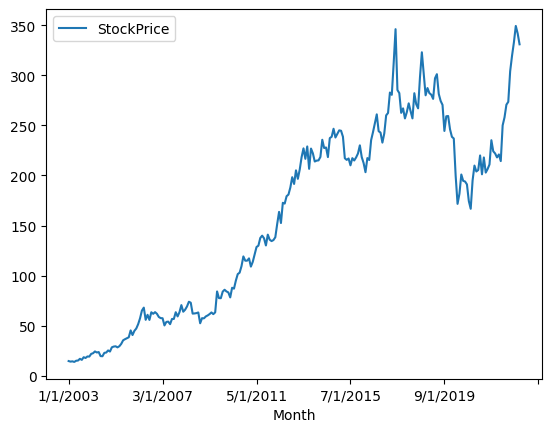

In [43]:
df.plot()

In [44]:
from statsmodels.tsa.stattools import adfuller

In [45]:
test_result=adfuller(df['StockPrice'])

In [46]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(stockprice):
    result=adfuller(stockprice)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [47]:
adfuller_test(df['StockPrice'])

ADF Test Statistic : -0.6143799177213124
p-value : 0.8676995367315576
#Lags Used : 12
Number of Observations Used : 228
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [48]:
#Differencing
df['Price First Difference'] = df['StockPrice'] - df['StockPrice'].shift(1)

In [49]:
df['StockPrice'].shift(1)

Month
1/1/2003        NaN
2/1/2003      14.83
3/1/2003      14.29
4/1/2003      14.56
5/1/2003      13.98
              ...  
9/1/2022     304.00
10/1/2022    319.50
11/1/2022    332.90
12/1/2022    349.25
1/1/2023     341.70
Name: StockPrice, Length: 241, dtype: float64

In [50]:
df['Seasonal First Difference']=df['StockPrice']-df['StockPrice'].shift(24)

In [51]:
df.head(14)

,StockPrice,Price First Difference,Seasonal First Difference
Month,,,
1/1/2003,14.83,NaN,NaN
2/1/2003,14.29,-0.54,NaN
3/1/2003,14.56,0.27,NaN
4/1/2003,13.98,-0.58,NaN
5/1/2003,15.17,1.19,NaN
6/1/2003,15.37,0.20,NaN
7/1/2003,17.09,1.72,NaN
8/1/2003,16.03,-1.06,NaN
9/1/2003,18.66,2.63,NaN


In [52]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.9620593137360602
p-value : 0.0016227427712002544
#Lags Used : 15
Number of Observations Used : 201
strong evidence against the null hypothesis(Ho), reject the null hypothesis.Data has no unit root and is stationary


<Axes: xlabel='Month'>

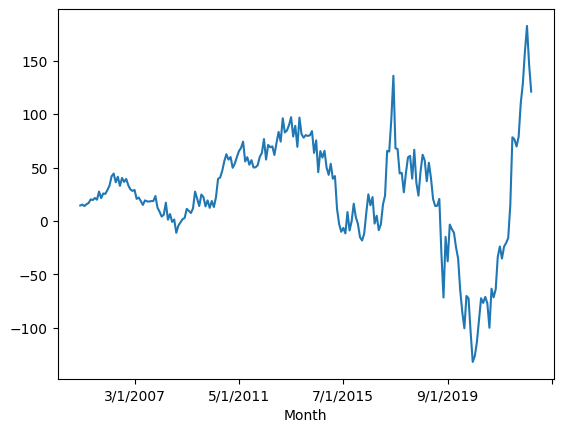

In [53]:
df['Seasonal First Difference'].plot()

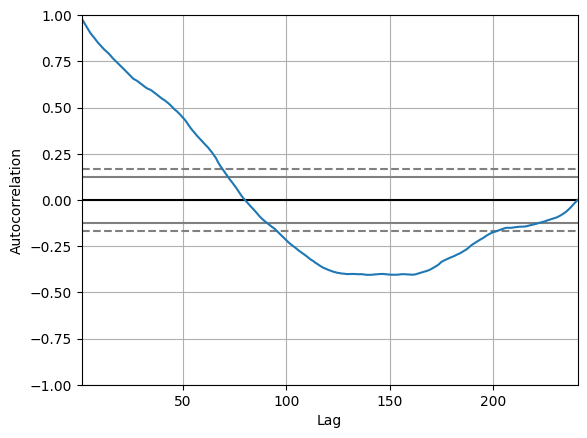

In [54]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['StockPrice'])
plt.show()

In [55]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

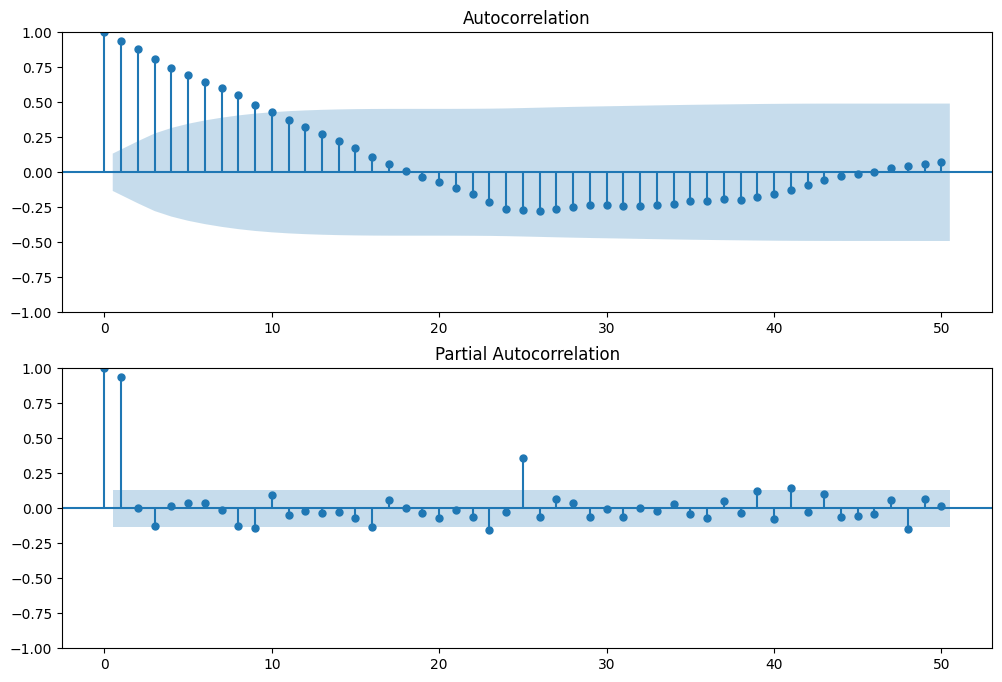

In [56]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal First Difference'].iloc[25:],lags=50,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal First Difference'].iloc[25:],lags=50,ax=ax2)

In [57]:
# For non-seasonal data
#p=2, d=2, q=19 
from statsmodels.tsa.arima.model import ARIMA

In [59]:
model=ARIMA(df['StockPrice'],order=(2,1,19))
model_fit=model.fit()

C:\Users\Anjali More\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anjali More\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anjali More\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anjali More\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [60]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             StockPrice   No. Observations:                  241
Model:                ARIMA(2, 1, 19)   Log Likelihood                -901.551
Date:                Fri, 01 Sep 2023   AIC                           1847.102
Time:                        00:02:20   BIC                           1923.676
Sample:                    01-01-2003   HQIC                          1877.956
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3475      0.449     -0.774      0.439      -1.227       0.532
ar.L2         -0.6395      0.433     -1.476      0.140      -1.489       0.210
ma.L1          0.3589      0.449      0.800      0.424      -0.520       1.238
ma.L2          0.6671      0.431      1.549      0.121      -0.177       1.511
ma.L3          0.0329      0.071      0.464      0.643      -0.106       0.172
ma.L4          0.0571      0.081      0.704      0.481      -0.102       0.216
ma.L5         -0.0364      0.088     -0.412      0.680      -0.210       0.137
ma.L6          0.0091      0.089      0.103      0.918      -0.165       0.183
ma.L7          0.0247      0.103      0.240      0.810      -0.177       0.226
ma.L8          0.1271      0.096      1.325      0.185      -0.061       0.315
ma.L9         -0.0841      0.099     -0.847      0.397      -0.279       0.110
ma.L10         0.3538      0.131      2.699      0.007       0.097       0.611
ma.L11        -0.0468      0.164     -0.285      0.775      -0.368       0.275
ma.L12         0.1097      0.174      0.629      0.530      -0.232       0.451
ma.L13        -0.1873      0.098     -1.910      0.056      -0.379       0.005
ma.L14         0.0739      0.101      0.731      0.465      -0.124       0.272
ma.L15        -0.0376      0.116     -0.324      0.746      -0.265       0.190
ma.L16         0.1735      0.103      1.686      0.092      -0.028       0.375
ma.L17         0.0590      0.098      0.605      0.545      -0.132       0.250
ma.L18         0.0136      0.085      0.160      0.873      -0.153       0.180
ma.L19        -0.0284      0.082     -0.347      0.729      -0.189       0.132
sigma2       102.0921      6.677     15.291      0.000      89.006     115.178
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               240.53
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              10.28   Skew:                            -0.78
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Month'>

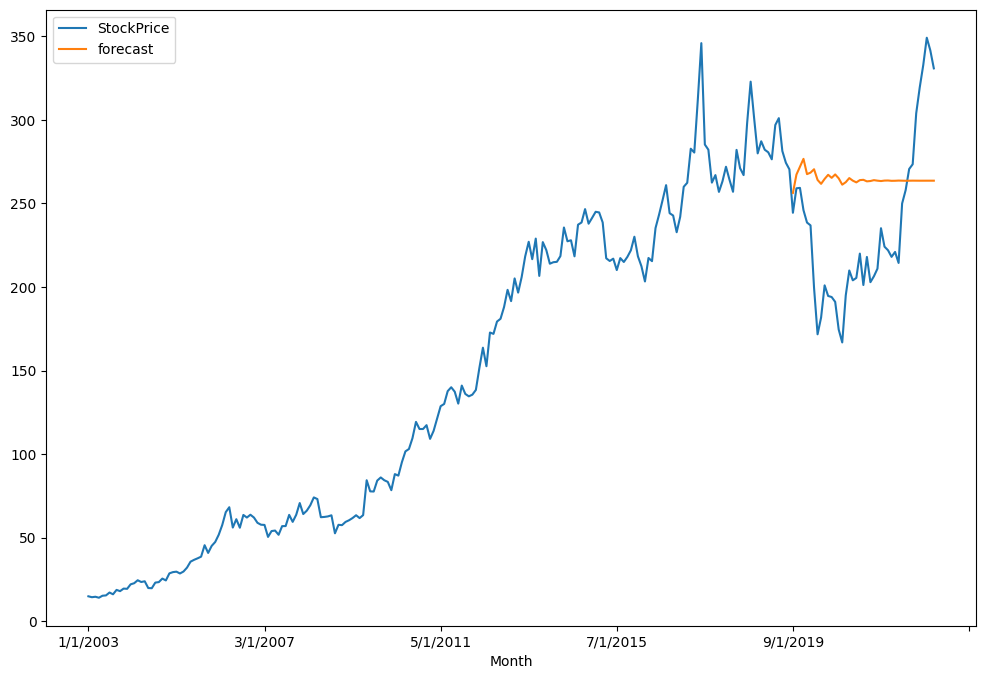

In [61]:
df['forecast']=results.predict(start=200,end=240,dynamic=True)
df[['StockPrice','forecast']].plot(figsize=(12,8))

In [62]:
import statsmodels.api as sm

In [63]:
model=sm.tsa.statespace.SARIMAX(df['StockPrice'],order=(2, 1, 19),seasonal_order=(1,1,1,24))
results=model.fit()

C:\Users\Anjali More\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anjali More\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Anjali More\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

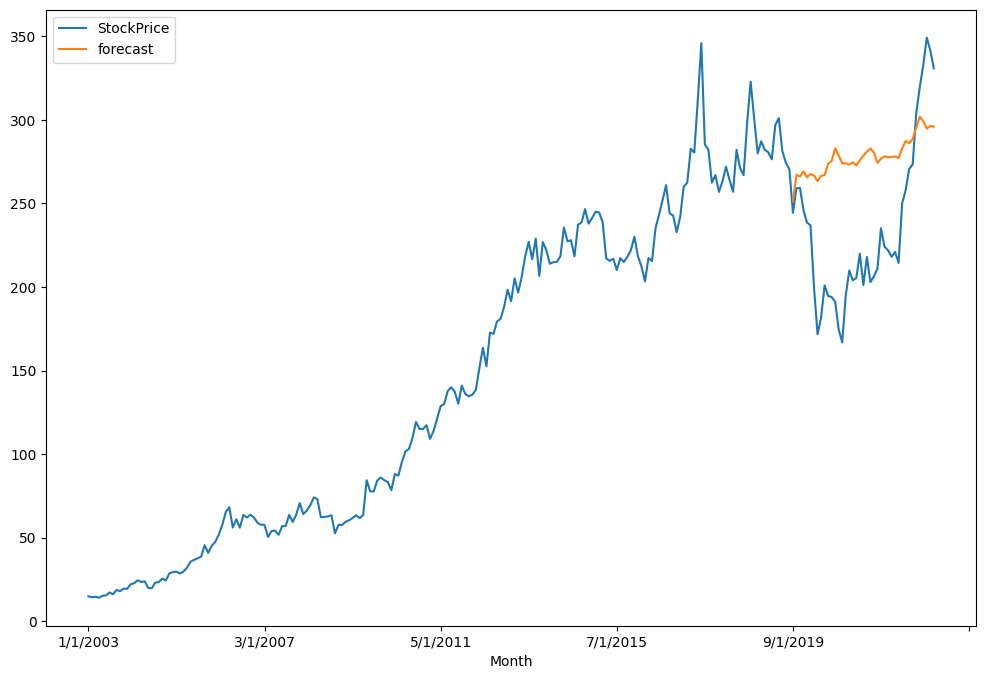

In [64]:
df['forecast']=results.predict(start=200,end=240,dynamic=True)
df[['StockPrice','forecast']].plot(figsize=(12,8))

In [66]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

# Convert index to datetime if it's in string format
df.index = pd.to_datetime(df.index)

# Calculate future dates using DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(1, 25)]

# Convert future_dates back to string format if needed
future_dates_str = [date.strftime('%Y-%m-%d') for date in future_dates]

# Print the future dates
print(future_dates_str)

['2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01', '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01', '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01', '2025-01-01']


In [67]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [68]:
future_datest_df.tail()

,StockPrice,Price First Difference,Seasonal First Difference,forecast
2024-09-01,NaN,NaN,NaN,NaN
2024-10-01,NaN,NaN,NaN,NaN
2024-11-01,NaN,NaN,NaN,NaN
2024-12-01,NaN,NaN,NaN,NaN
2025-01-01,NaN,NaN,NaN,NaN


In [69]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

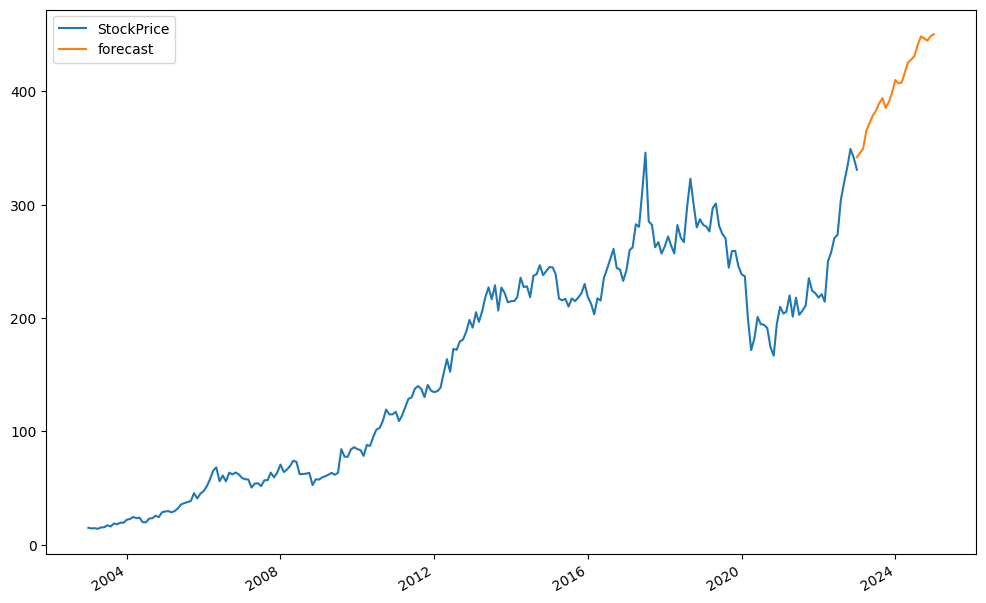

In [72]:
future_df['forecast'] = results.predict(start =240, end = 300, dynamic= True)  
future_df[['StockPrice', 'forecast']].plot(figsize=(12, 8)) 